<a href="https://colab.research.google.com/github/MagicMoleMM/ML/blob/main/TF_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
mapping = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress",
           4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag",
           9: "Ankle boot"}  # датасет содержит 10 классов

def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {mapping[labels[i]]}. Pred: {mapping[predicted_labels[i]]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {mapping[labels[i]]}")

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


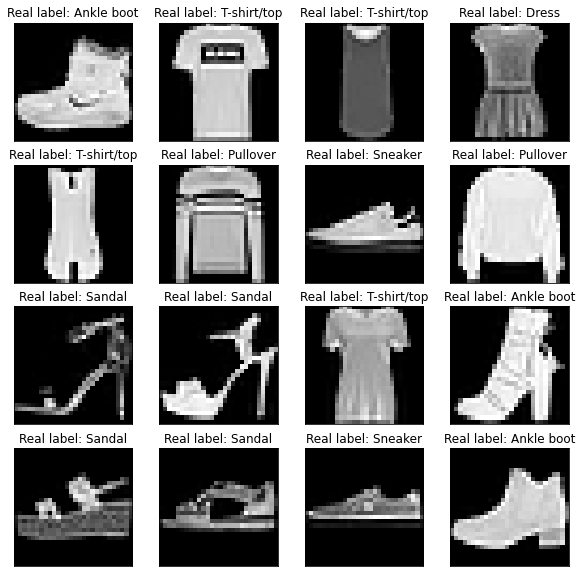

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
print(x_train.shape, x_test.shape)

In [4]:
x_train = x_train[...,None]
x_test = x_test[...,None]
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu', input_shape=(28, 28, 1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.python.keras import activations
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activations.relu))
model.add(tf.keras.layers.Dense(10, activations.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [7]:
from tensorflow.python.ops import losses
from tensorflow.python.keras.engine.training import optimizers
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
#model.fit(x=x_train, y=y_train,
#          batch_size=128, epochs=20, 
#          validation_data=(x_test,y_test))

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu', input_shape=(28, 28, 1))) 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activations.relu))
model.add(tf.keras.layers.Dense(10, activations.softmax))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
#model.fit(x=x_train, y=y_train,
#          batch_size=128, epochs=20, 
#          validation_data=(x_test,y_test))

In [12]:
import os
from pathlib import Path
import PIL
import PIL.Image

In [13]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [14]:
# определим папки с данными
base_dir = Path(zip_dir).parent / "cats_and_dogs_filtered"
train_dir = base_dir / 'train'
validation_dir = base_dir / 'validation'

train_cats_dir = train_dir / 'cats'
train_dogs_dir = train_dir / 'dogs'
validation_cats_dir = validation_dir / 'cats'
validation_dogs_dir = validation_dir / 'dogs'

In [15]:
num_cats_tr = len(list(train_cats_dir.glob("*"))) # .glob("*") создает итератор по всем файлам в директории
num_dogs_tr = len(list(train_dogs_dir.glob("*")))

num_cats_val = len(list(validation_cats_dir.glob("*")))
num_dogs_val = len(list(validation_dogs_dir.glob("*")))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [16]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


(89, 120, 3)
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2051.jpg


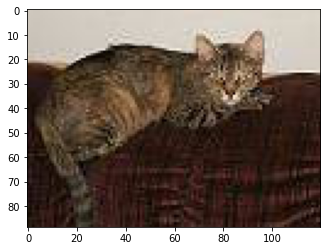

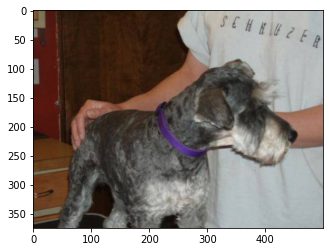

In [17]:
image_path = str(list(validation_cats_dir.glob("*"))[0])
image = plt.imread(image_path)
plt.figure()
plt.imshow(image)
print(image.shape)

image_path = str(list(validation_dogs_dir.glob("*"))[0])
image = plt.imread(image_path)
plt.figure()
plt.imshow(image)
print(image_path)

In [18]:
BATCH_SIZE = 200 # размер батча -- т.е. количество картинок которые мы считываем за раз
                 # во многом зависит от доступной памяти GPU. 
                 # Если ее не хватит (появится такая ошибка) значит нужно уменьшить размер батча или картинки
img_height = 180
img_width = 180

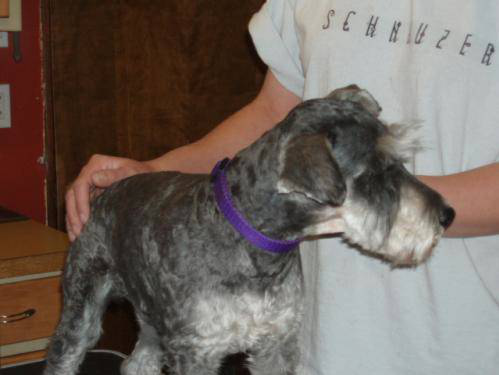

In [19]:
PIL.Image.open(image_path)


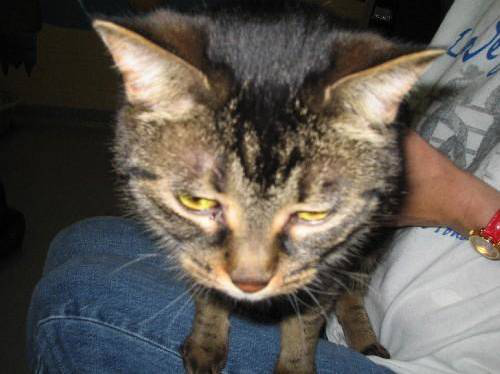

In [20]:
PIL.Image.open(str(list(validation_cats_dir.glob("*"))[1]))

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 2000 files belonging to 2 classes.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  shuffle=False,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 1000 files belonging to 2 classes.


In [23]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


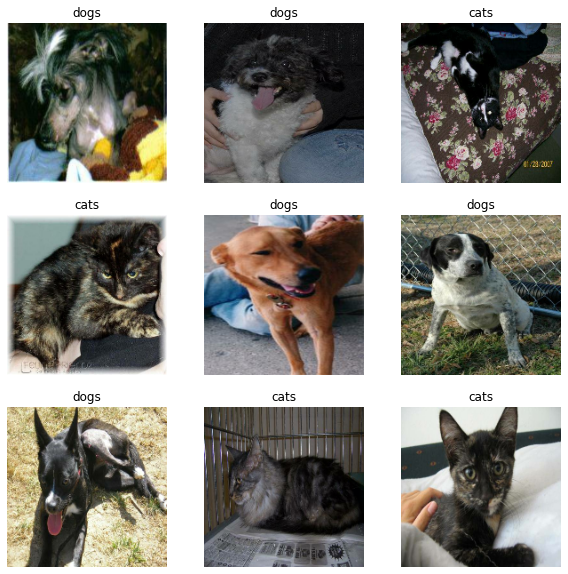

In [24]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [26]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

In [27]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [28]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
10/10 [==============================] - 16s 363ms/step - loss: 0.6949 - accuracy: 0.4910 - val_loss: 0.6921 - val_accuracy: 0.5040
Epoch 2/30
10/10 [==============================] - 2s 250ms/step - loss: 0.6916 - accuracy: 0.5125 - val_loss: 0.6906 - val_accuracy: 0.5350
Epoch 3/30
10/10 [==============================] - 2s 250ms/step - loss: 0.6908 - accuracy: 0.5165 - val_loss: 0.6847 - val_accuracy: 0.5870
Epoch 4/30
10/10 [==============================] - 2s 253ms/step - loss: 0.6842 - accuracy: 0.5620 - val_loss: 0.6817 - val_accuracy: 0.5690
Epoch 5/30
10/10 [==============================] - 2s 251ms/step - loss: 0.6773 - accuracy: 0.5775 - val_loss: 0.6635 - val_accuracy: 0.6270
Epoch 6/30
10/10 [==============================] - 2s 251ms/step - loss: 0.6651 - accuracy: 0.5860 - val_loss: 0.6423 - val_accuracy: 0.6330
Epoch 7/30
10/10 [==============================] - 2s 254ms/step - loss: 0.6560 - accuracy: 0.6015 - val_loss: 0.6353 - val_accuracy: 0.6360
Epoch

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 128)      

In [30]:
model.predict(val_ds)[0]

5/5 [==============================] - 1s 89ms/step


array([0.31999108, 0.6729389 ], dtype=float32)

5/5 [==============================] - 0s 90ms/step


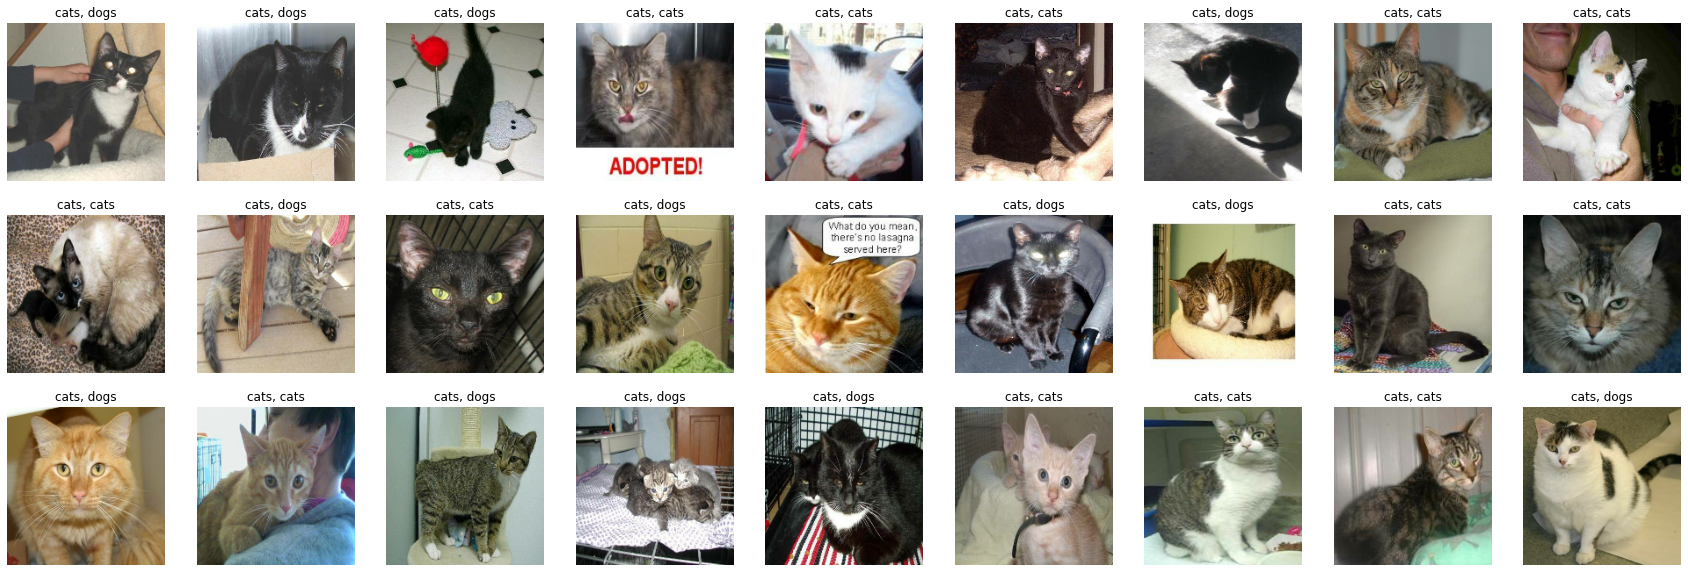

In [31]:
plt.figure(figsize=(30, 10))
for images, labels in val_ds.take(1):
  for i in range(27):
    ax = plt.subplot(3, 9, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f'{class_names[labels[i]]}, {class_names[np.argmax(model.predict(val_ds)[i])]}')
    plt.axis("off")

In [32]:
predicted_labels = np.argmax(model.predict(val_ds)[0])
class_names[np.argmax(model.predict(val_ds)[0])]

5/5 [==============================] - 0s 90ms/step


'dogs'

In [33]:
!pip install livelossplot
from livelossplot.inputs.tf_keras import PlotLossesCallback

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


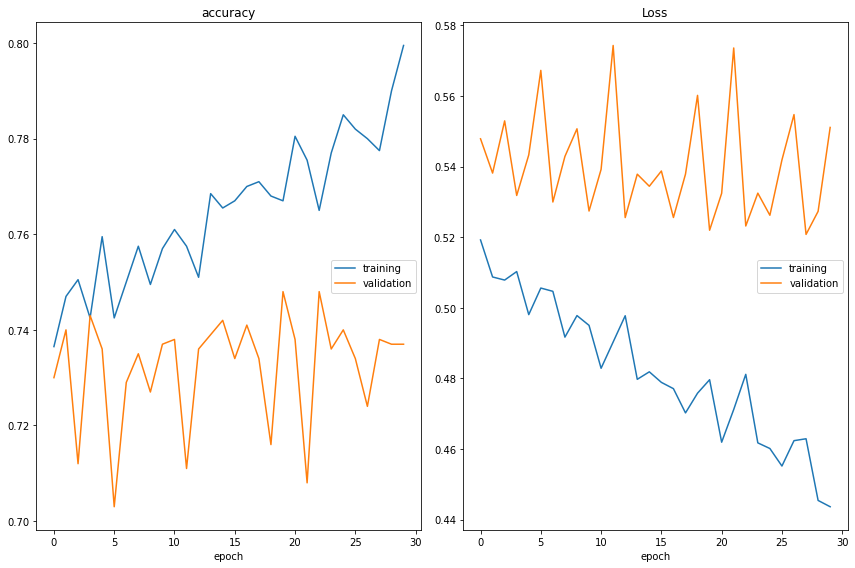

accuracy
	training         	 (min:    0.737, max:    0.799, cur:    0.799)
	validation       	 (min:    0.703, max:    0.748, cur:    0.737)
Loss
	training         	 (min:    0.444, max:    0.519, cur:    0.444)
	validation       	 (min:    0.521, max:    0.574, cur:    0.551)
10/10 [==============================] - 3s 299ms/step - loss: 0.4436 - accuracy: 0.7995 - val_loss: 0.5511 - val_accuracy: 0.7370


In [34]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30,
  callbacks=[PlotLossesCallback()]
)

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 128)      

5/5 [==============================] - 0s 90ms/step


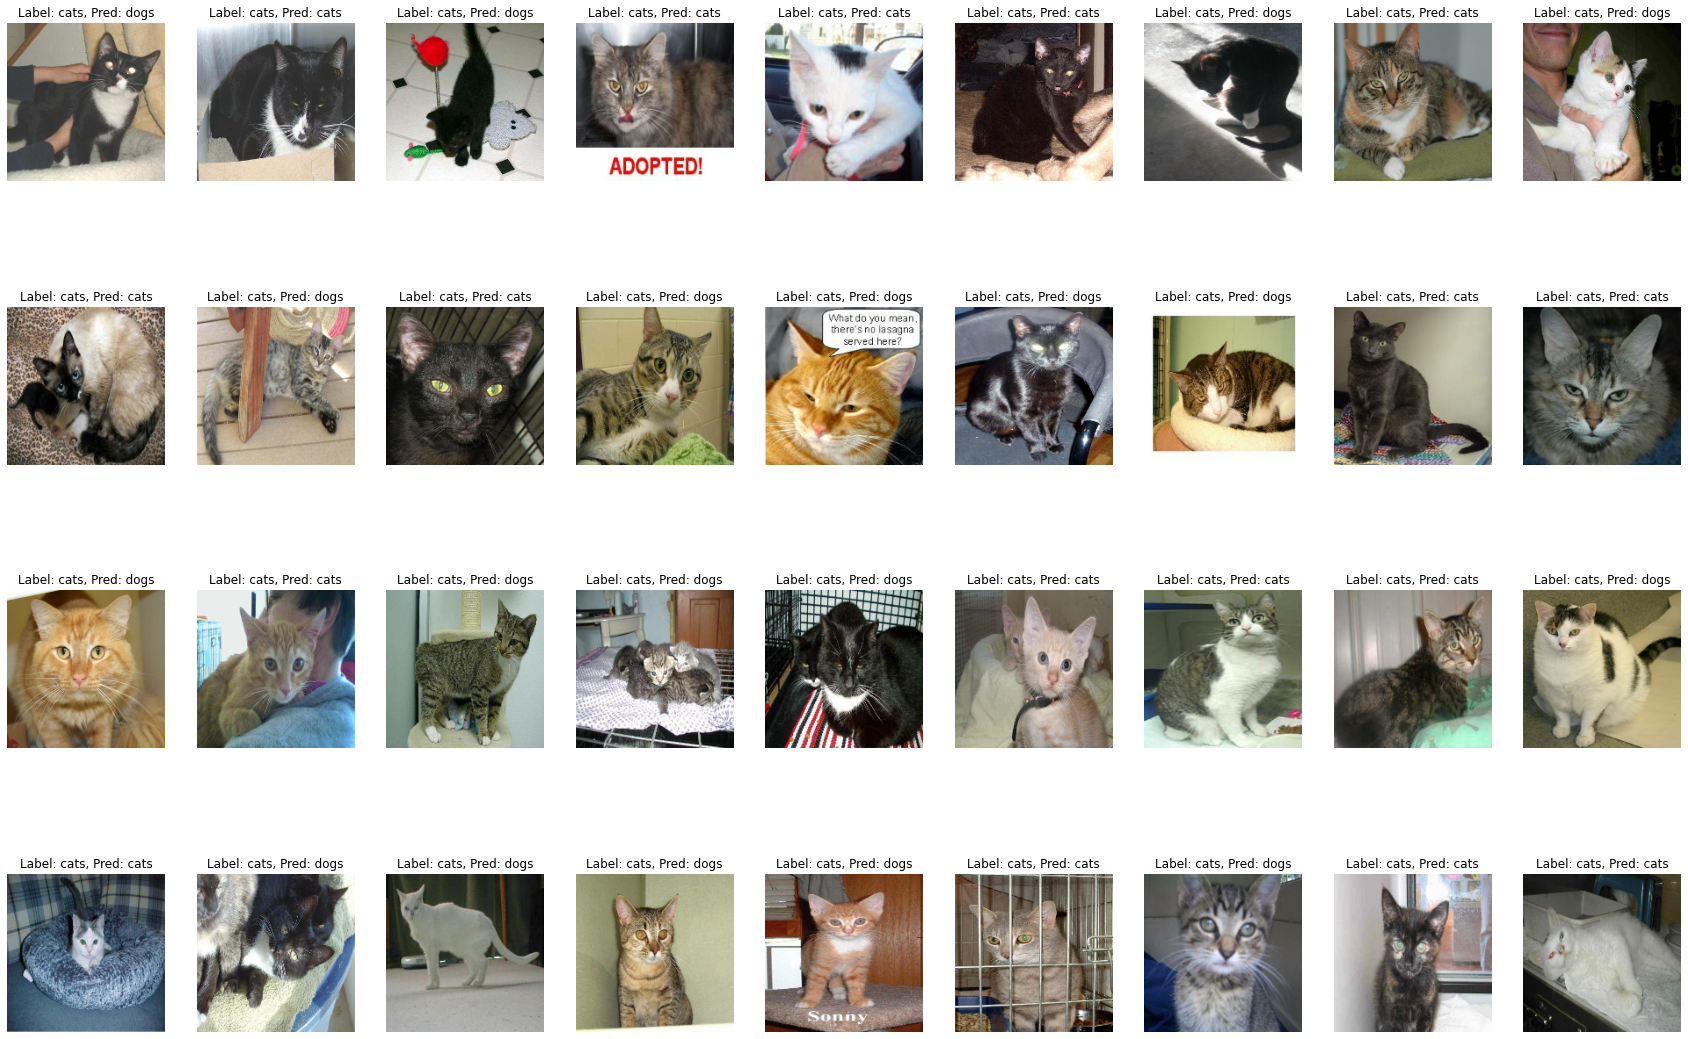

In [36]:
plt.figure(figsize=(30, 20))
for images, labels in val_ds.take(1):
  for i in range(36):
    ax = plt.subplot(4, 9, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f'Label: {class_names[labels[i]]}, Pred: {class_names[np.argmax(model.predict(val_ds)[i])]}')
    plt.axis("off")

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
# а теперь мы попросим его изменять изображение на лету, добавляя повороты, отражения и тд
train_image_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,  # максимальный угол поворота
      width_shift_range=0.2, # смещение максимум на 20% ширины по горизонтали
      height_shift_range=0.2, # смещение максимум на 20% высоты по вертикали
      zoom_range=0.2, # картинка будет увеличена или уменьшена не более чем на 20% 
      horizontal_flip=True, # случайное отражение по горизонтали
      fill_mode="nearest"
      ) 

In [51]:
train_data_gen = train_image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     class_mode='binary')



Found 2000 images belonging to 2 classes.


In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.GlobalAveragePooling2D(), # добавили GAP
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 20, 20, 128)     

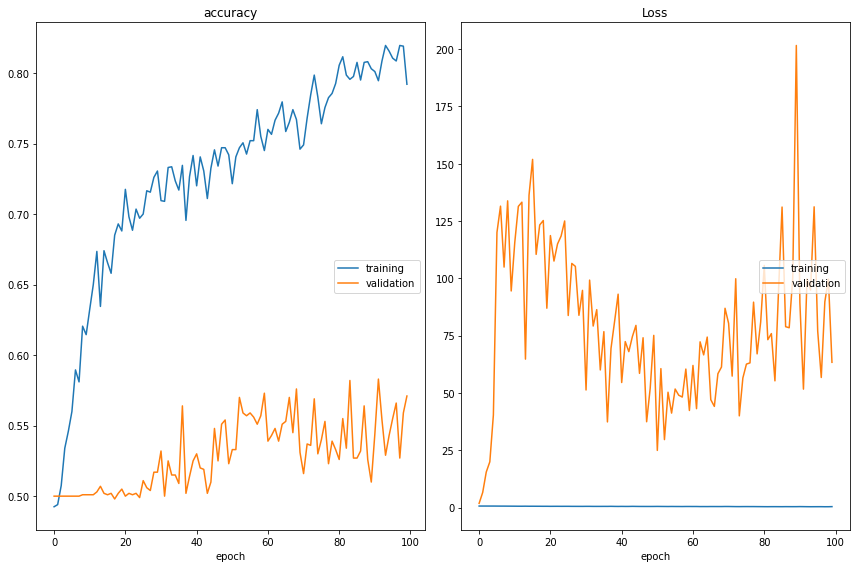

accuracy
	training         	 (min:    0.493, max:    0.820, cur:    0.792)
	validation       	 (min:    0.498, max:    0.583, cur:    0.571)
Loss
	training         	 (min:    0.395, max:    0.696, cur:    0.441)
	validation       	 (min:    1.882, max:  201.597, cur:   63.389)
10/10 [==============================] - 17s 2s/step - loss: 0.4412 - accuracy: 0.7920 - val_loss: 63.3894 - val_accuracy: 0.5710


In [57]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=[PlotLossesCallback()])

5/5 [==============================] - 0s 93ms/step


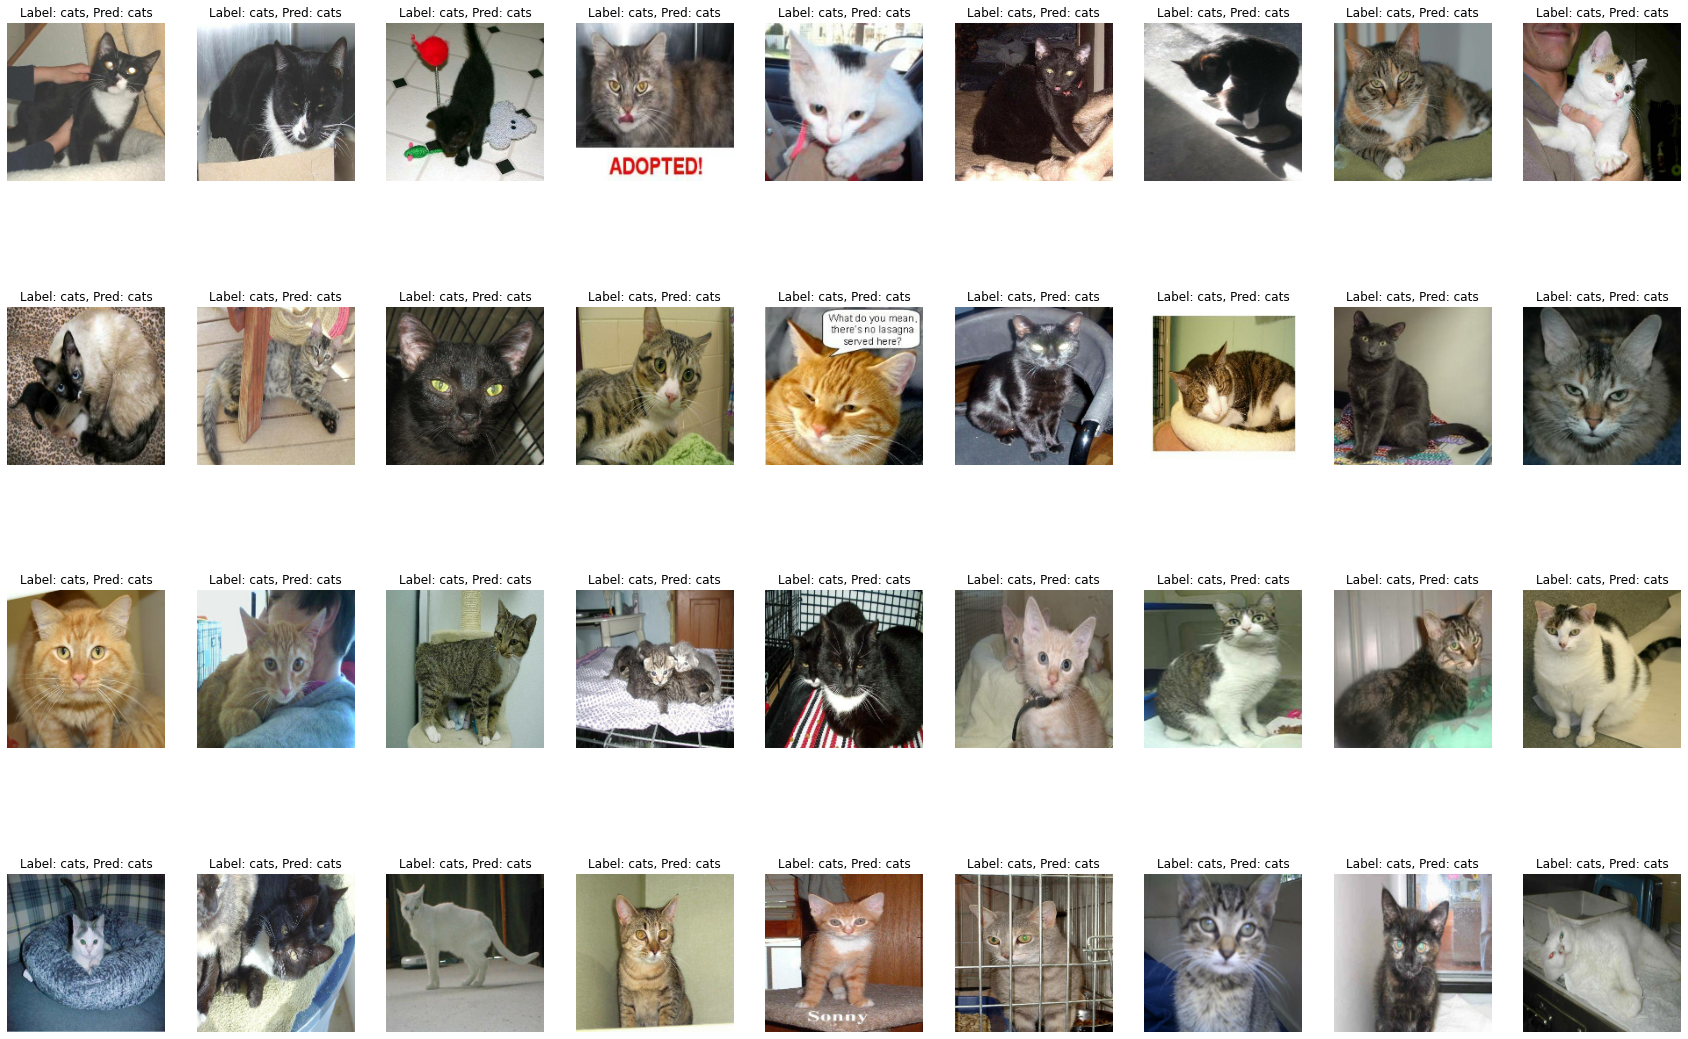

In [58]:
plt.figure(figsize=(30, 20))
for images, labels in val_ds.take(1):
  for i in range(36):
    ax = plt.subplot(4, 9, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f'Label: {class_names[labels[i]]}, Pred: {class_names[np.argmax(model.predict(val_ds)[i])]}')
    plt.axis("off")